In [78]:
#!pip install tensorflow
#!pip install keras

In [79]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM ,Dense ,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import pickle

In [80]:
%matplotlib inline

In [81]:
df = pd.read_csv('Chad.csv')

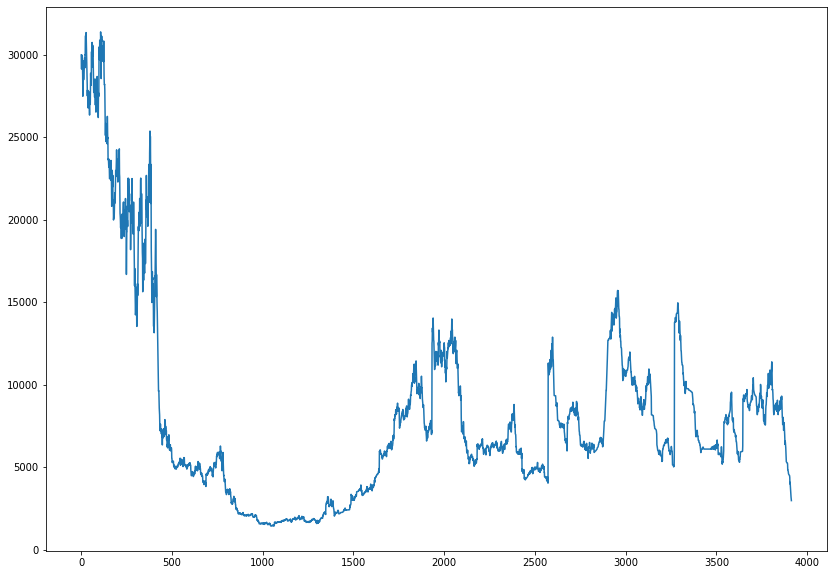

In [82]:
plt.figure(figsize=(14,10))
plt.plot(df['Open'])


plt.show()

In [83]:
df.sort_index(axis=0,inplace=True,ascending=False)
df=df.reset_index(drop=True)
df

,Date,Open,High,low,Close,Volume
0,20031019,2991,2991,2900,2916,2000000
1,20031020,3061,3061,3061,3061,7500000
2,20031021,3214,3214,3214,3214,6000000
3,20031022,3374,3374,3374,3374,3000000
4,20031025,3542,3542,3542,3542,9327800
...,...,...,...,...,...,...
3909,20220205,30000,30240,29560,29610,5515311
3910,20220206,29950,29950,28210,29160,4915291
3911,20220207,29150,29870,29010,29200,1705522
3912,20220208,29690,29890,29030,29580,3800062


In [84]:
df,df.shape

(          Date   Open   High    low  Close   Volume
 0     20031019   2991   2991   2900   2916  2000000
 1     20031020   3061   3061   3061   3061  7500000
 2     20031021   3214   3214   3214   3214  6000000
 3     20031022   3374   3374   3374   3374  3000000
 4     20031025   3542   3542   3542   3542  9327800
 ...        ...    ...    ...    ...    ...      ...
 3909  20220205  30000  30240  29560  29610  5515311
 3910  20220206  29950  29950  28210  29160  4915291
 3911  20220207  29150  29870  29010  29200  1705522
 3912  20220208  29690  29890  29030  29580  3800062
 3913  20220209  30000  30000  29410  29620  1754238
 
 [3914 rows x 6 columns], (3914, 6))

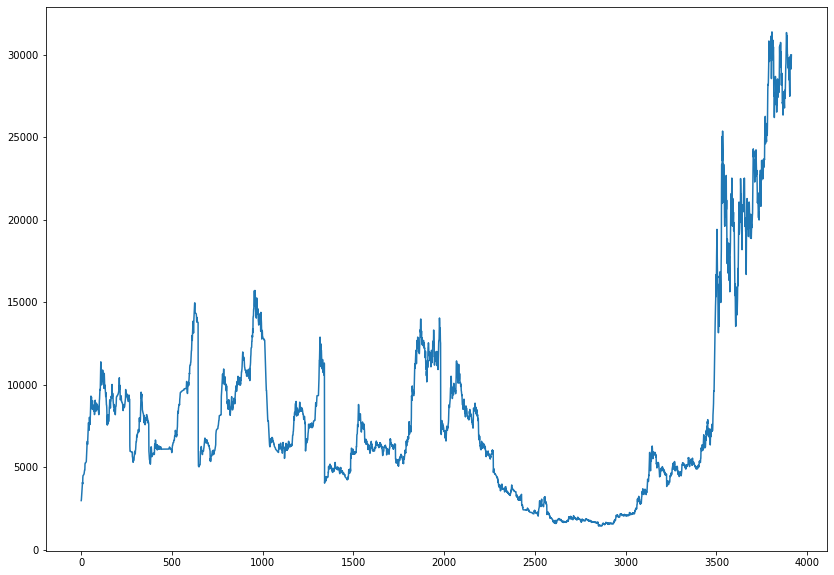

In [85]:
plt.figure(figsize=(14,10))
plt.plot('Open', data=df)


plt.show()

In [86]:
data=df.iloc[:,1:2].values
data.shape

(3914, 1)

In [87]:
scaler=MinMaxScaler(feature_range=(0,1))

In [88]:
data_norm = scaler.fit_transform(data)

In [89]:
X=[]
y=[]
for i in range(60,data_norm.shape[0]):
    X.append(data_norm[i-60:i,0])
    y.append(data_norm[i,0])
X = np.array(X)
y = np.array(y).reshape(-1,1)

In [90]:
X.shape,y.shape

((3854, 60), (3854, 1))

In [91]:
n=int(X.shape[0]*0.9)
X_train,X_test,y_train,y_test=X[:n,:],X[n:,:],y[:n],y[n:]

In [92]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3468, 60), (3468, 1), (386, 60), (386, 1))

In [93]:
reg = Sequential()
reg.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [94]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X_train,y_train,epochs=1,batch_size=64)

55/55 [==============================] - 23s 235ms/step - loss: 0.0059


In [95]:
y_pred_train=reg.predict(X_train)

In [96]:
print("R2 Score for traning: {:.2f}%".format(r2_score(y_train,y_pred_train)*100))

R2 Score for traning: 84.64%


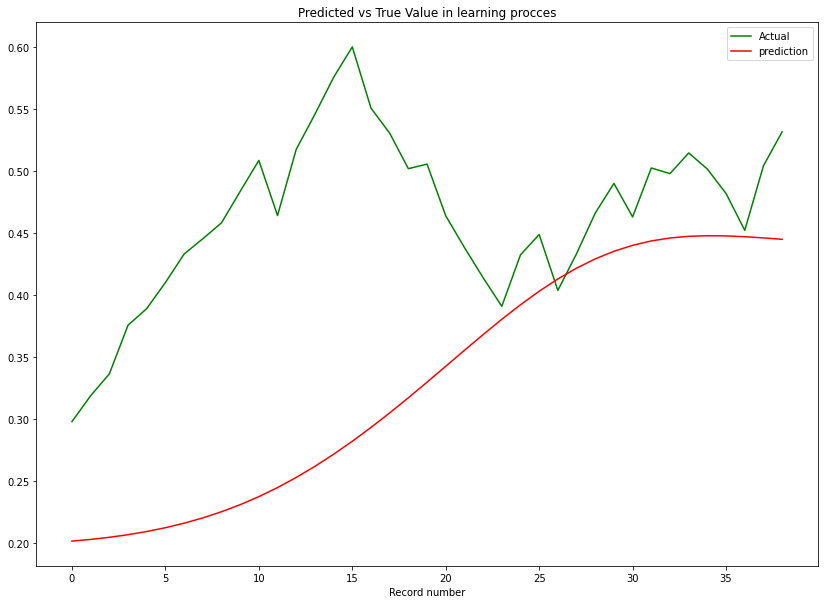

In [97]:
plt.figure(figsize=(14,10))
plt.plot(range(39),y_train[-40:-1], color = "green")
plt.plot(range(39),y_pred_train[-40:-1], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value in learning procces")
plt.xlabel("Record number")

plt.show()

In [98]:
y_pred=reg.predict(X_test)

In [99]:
y_pred.shape

(386, 1)

In [100]:
print("R2 Score: {:.2f}%".format(r2_score(y_test,y_pred)*100))

R2 Score: -79.42%


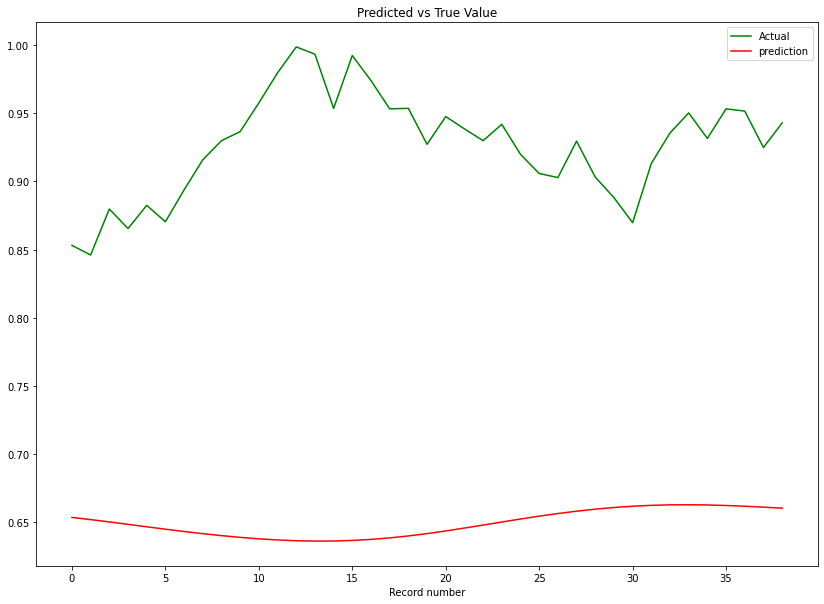

In [101]:
plt.figure(figsize=(14,10))
plt.plot(range(39),y_test[-40:-1], color = "green")
plt.plot(range(39),y_pred[-40:-1], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

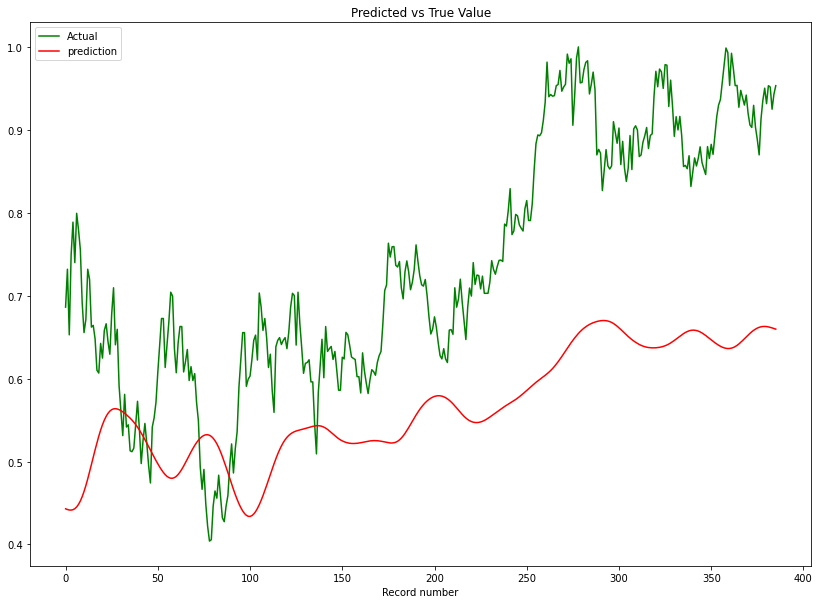

In [102]:
plt.figure(figsize=(14,10))
plt.plot(range(len(y_test)),y_test, color = "green")
plt.plot(range(len(y_pred)),y_pred, color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

In [103]:
reg.compile(optimizer='adam',loss='mean_squared_error')
reg.fit(X,y,epochs=1,batch_size=64)

61/61 [==============================] - 24s 235ms/step - loss: 0.0044


In [104]:
data_new=data_norm
for i in range(15):
    X_60 = data_new[-60:]
    X_60=np.reshape(X_60,(1,-1))
    y_pred=reg.predict(X_60)
    data_new=np.append(data_new,y_pred)

In [105]:
data_norm.shape,data_new.shape

((3914, 1), (3929,))

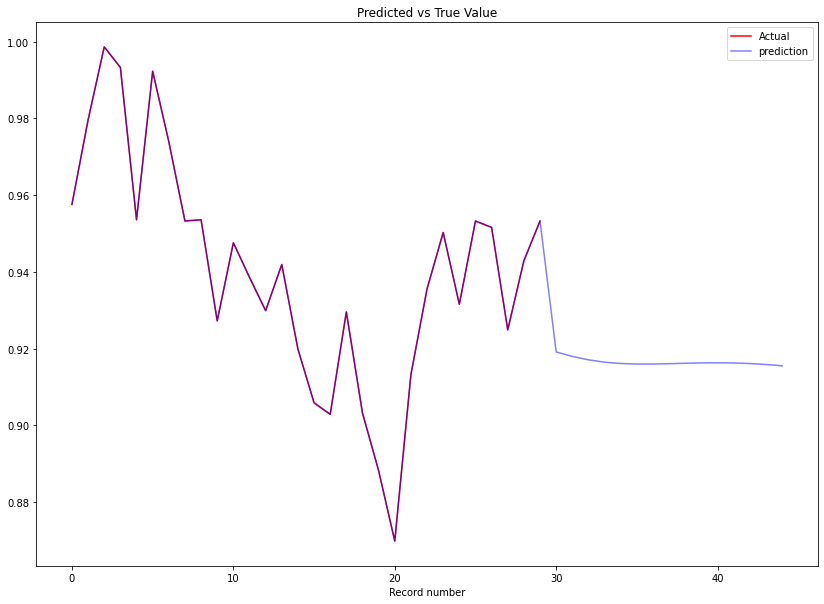

In [112]:
X1=data_norm[-30:]
X2=data_new[-45:]
plt.figure(figsize=(14,10))
plt.plot(range(len(X1)),X1, color = "red")
plt.plot(range(len(X2)),X2, color = "Blue",alpha=0.5)
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")

plt.show()

In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(reg, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://6e71b1a4-2b1d-4438-bcd2-82ef7145b737/assets


INFO:tensorflow:Assets written to: ram://6e71b1a4-2b1d-4438-bcd2-82ef7145b737/assets


In [ ]:
#model = pickle.load(open(filename, 'rb'))